In [28]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv('data.csv')
df = df[['title', 'tag', 'body']]
# convert to unicode
df['title'] = df['title'].astype(str)
df['tag'] = df['tag'].astype(str)
df['body'] = df['body'].astype(str)
df.head()

,title,tag,body
0,What is the strangest movie or short film you ...,Discussion,The more obscure the better. Films that are ju...
1,"Am I insane, or does it sound like Tom Hanks i...",Discussion,This is the trailer I'm talking about: [https:...
2,"Glen Powell, Anthony Mackie and Laura Dern to ...",News,nan
3,Characters appearances or the actors,Discussion,When you watch a movie about a fictional chara...
4,New poster for 'GOOD ONE',Poster,nan


In [30]:
# drop missing values
df = df.dropna()
df.isnull().sum()

title    0
tag      0
body     0
dtype: int64

In [31]:
documents = df['tag'] + ' on ' + df['title'] + ' ' + df['body']
documents.head()

0    Discussion on What is the strangest movie or s...
1    Discussion on Am I insane, or does it sound li...
2    News on Glen Powell, Anthony Mackie and Laura ...
3    Discussion on Characters appearances or the ac...
4              Poster on New poster for 'GOOD ONE' nan
dtype: object

In [32]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(documents)

In [33]:
dbscan = DBSCAN(eps=2, min_samples=15)
dbscan.fit(vectors)

DBSCAN(eps=2, min_samples=15)

In [34]:
cluster_labels = dbscan.labels_
coords = vectors.toarray()

In [35]:
no_clusters = len(np.unique(cluster_labels) )
no_noise = np.sum(np.array(cluster_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 0


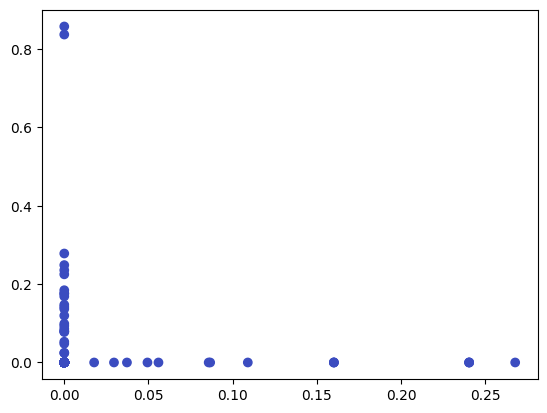

In [36]:
colors = list(map(lambda x: '#3b4cc0' if x == 0 else '#b40426', cluster_labels))
plt.scatter(coords[:, 0], coords[:, 1], c=colors)
plt.show()